In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [2]:
data=pd.read_csv("../data/train.csv")
df=pd.DataFrame(data)
print(len(df))
df=df.fillna(0)
# Having a very less amount of data it is better to fill the values instead of dropping the rows whrn there is presence of null values

891


In [3]:
print(len(df["Cabin"]))

891


In [4]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   23.799293    0.523008   
std     257.353842    0.486592    0.836071   17.596074    1.102743   
min       1.000000    0.000000    1.000000    0.000000    0.000000   
25%     223.500000    0.000000    2.000000    6.000000    0.000000   
50%     446.000000    0.000000    3.000000   24.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [5]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500     0        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250     0        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500     0        S  


In [6]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


array([[<AxesSubplot:xlabel='PassengerId', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='Survived', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='Pclass', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='Age', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='SibSp', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='Parch', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='Fare', ylabel='PassengerId'>],
       [<AxesSubplot:xlabel='PassengerId', ylabel='Survived'>,
        <AxesSubplot:xlabel='Survived', ylabel='Survived'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Survived'>,
        <AxesSubplot:xlabel='Age', ylabel='Survived'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Survived'>,
        <AxesSubplot:xlabel='Parch', ylabel='Survived'>,
        <AxesSubplot:xlabel='Fare', ylabel='Survived'>],
       [<AxesSubplot:xlabel='PassengerId', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Survived', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Pclass', ylabel='

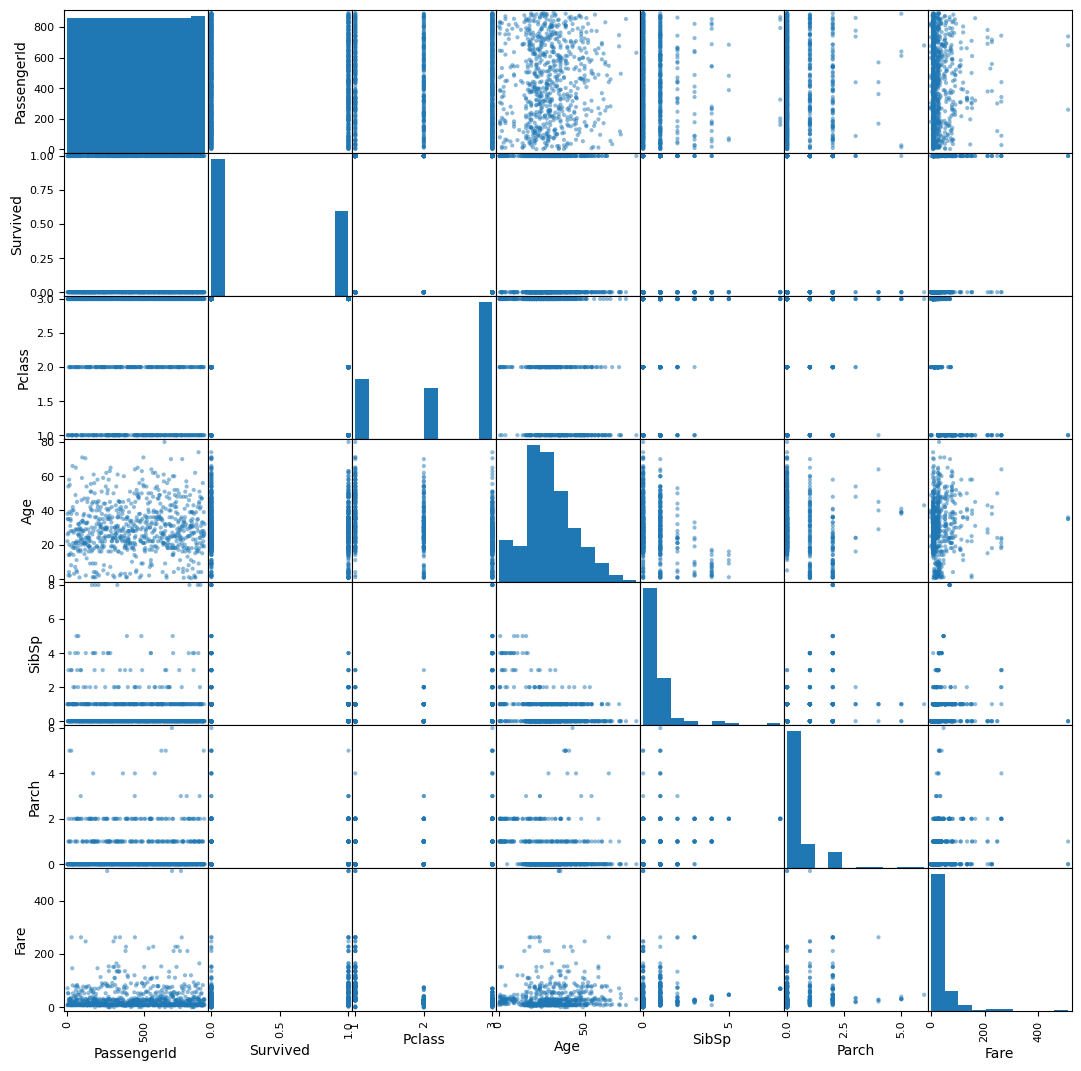

In [7]:
from pandas.plotting import scatter_matrix
attributes=['PassengerId', 'Survived', 'Pclass','Name', 'Sex', 'Age', 'SibSp','Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
scatter_matrix(data[attributes],figsize=(13,13))

In [8]:
print(df["Cabin"].unique())
print(len(df["Cabin"].unique()))

[0 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']
148


In [9]:
a=['C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27' ,'D33', 'B30', 'C83',
 'F33', 'F G73', 'E31', 'A5', 'D10 D12' ,'D26', 'C110', 'B58 B60', 'E101', 'D47',
 'B86', 'F2', 'C2', 'B19', 'A7', 'C49', 'F4', 'B4' ,'B80', 'A31', 'D36', 'D15' ,'C93',
 'C78', 'D35', 'C87', 'B77', 'E67' ,'B94', 'C125', 'C99' ,'C118', 'D7' ,'B49', 'D',
 'C22 C26', 'C65', 'E36' ,'C54', 'B57 B59 B63 B66' ,'C7', 'E34', 'C32', 'B18',
 'C124', 'C91', 'E40', 'T', 'E33', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10',
 'C52', 'E44' ,'A34', 'C104' ,'C111', 'C92', 'E38', 'E12' ,'E63', 'B37', 'C30', 'D20',
 'B79' ,'E25', 'D46' ,'B73', 'B38', 'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68',
 'A10', 'E68' ,'B41', 'A20', 'D19', 'D50', 'D9', 'A23' ,'B50', 'A26', 'D48', 'E58',
 'B71', 'B51 B53 B55' ,'D49', 'B5', 'B20' ,'F G63', 'C62 C64', 'E24' ,'C90', 'C126',
 'C45' ,'E8' ,'B101', 'C46', 'D30' ,'E121', 'D11' ,'E77', 'B3', 'D6', 'B82 B84',
 'D17', 'A36', 'B69', 'E49', 'D28', 'E17', 'A24', 'C50' ,'B42' ,'C148','F E69','F38','A14','D45','A19','B102','D21','B78','C47','A32','B28','C95','C106','C95','C128','C95']
p=[int(x) for x in range(len(a))]
df["Cabin"]=df["Cabin"].replace(to_replace=a,value=p)
print(len(a))

149


In [10]:

df["Sex"]=df["Sex"].replace(to_replace=["male","female"],value=[1,0])
print(df["Embarked"].unique())
df["Embarked"]=df["Embarked"].replace(to_replace=['C','S','Q'],value=[0,1,2])
X=df[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Cabin', 'Embarked']]
y=df["Survived"]
# # print(df["Sex"])



['S' 'C' 'Q' 0]


In [11]:
print(df["Embarked"].unique())
df["Embarked"]=df["Embarked"].replace(to_replace=['C','S','Q'],value=[0,1,2])

# print(df["Sex"])

[1 0 2]


In [12]:
X=df[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Cabin', 'Embarked']]
y=df["Survived"]

In [13]:
print(df["Cabin"])

0        0
1        0
2        0
3        1
4        0
      ... 
886      0
887    131
888      0
889    132
890      0
Name: Cabin, Length: 891, dtype: int64


In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=42,train_size=0.99)
print(X)

     PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare  Cabin  Embarked
0              1       3    1  22.0      1      0   7.2500      0         1
1              2       1    0  38.0      1      0  71.2833      0         0
2              3       3    0  26.0      0      0   7.9250      0         1
3              4       1    0  35.0      1      0  53.1000      1         1
4              5       3    1  35.0      0      0   8.0500      0         1
..           ...     ...  ...   ...    ...    ...      ...    ...       ...
886          887       2    1  27.0      0      0  13.0000      0         1
887          888       1    0  19.0      0      0  30.0000    131         1
888          889       3    0   0.0      1      2  23.4500      0         1
889          890       1    1  26.0      0      0  30.0000    132         0
890          891       3    1  32.0      0      0   7.7500      0         2

[891 rows x 9 columns]


In [15]:
print(len(X))
print(len(y))

891
891


In [16]:
from sklearn.linear_model import LogisticRegression

# lg_reg=LogisticRegression()
lg_reg=Pipeline([
    ('attribute',SimpleImputer(strategy="median")),
    ('lg_clf',LogisticRegression(solver='lbfgs', max_iter=1000))
])
lg_reg.fit(x_train,y_train)
y_pred=lg_reg.predict(x_test)
print(accuracy_score(y_pred,y_test))

0.8888888888888888


In [17]:
from sklearn.tree import DecisionTreeClassifier
# dcs_clf=DecisionTreeClassifier(max_depth=1)
dcs_clf=Pipeline([
    ('attribute',SimpleImputer(strategy="median")),
    ('dcs_clf',DecisionTreeClassifier(max_depth=1))
])
dcs_clf.fit(x_train,y_train)
y_pred=dcs_clf.predict(x_test)
print(accuracy_score(y_pred,y_test))

0.8888888888888888


In [18]:
from sklearn.ensemble import RandomForestClassifier
maximum=100
res=1
for i in range(1,15):
    maximum_now=RandomForestClassifier(n_estimators=1000,max_leaf_nodes=1000,n_jobs=-1,max_depth=i)
    maximum_now.fit(x_train,y_train)
    a=accuracy_score(y_train,maximum_now.predict(x_train))*100
    b=accuracy_score(y_test,maximum_now.predict(x_test))*100
    if(abs(a-b)<maximum):
          res=i
          maximum=abs(a-b)
forest_clf=RandomForestClassifier(n_estimators=1000,max_leaf_nodes=1000,n_jobs=-1,max_depth=res)
forest_clf.fit(x_train,y_train)
y_pred=forest_clf.predict(x_test)
print(accuracy_score(y_pred,y_test))

print('Training Accuracy : ', 
      accuracy_score(y_train,
                             forest_clf.predict(x_train))*100)
print('Validation Accuracy : ', 
      accuracy_score(y_test, 
                             forest_clf.predict(x_test))*100)

0.8888888888888888
Training Accuracy :  89.00226757369614
Validation Accuracy :  88.88888888888889


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
log_clf=LogisticRegression(solver='lbfgs', max_iter=1000)
rnd_clf=RandomForestClassifier(n_estimators=1000,max_leaf_nodes=1000,n_jobs=-1)
svm_clf=SVC()
voting_clf=VotingClassifier(estimators=[
    ('rf',rnd_clf),('svc',svm_clf),('lg',log_clf)
])
voting_clf.fit(x_train,y_train)
y_pred=voting_clf.predict(x_test)
print(accuracy_score(y_pred,y_test))

0.7777777777777778


In [20]:
from sklearn.ensemble import AdaBoostClassifier
adaf_clf=AdaBoostClassifier(
    RandomForestClassifier(n_estimators=1000,max_leaf_nodes=1000,n_jobs=-1,max_depth=7),n_estimators=1000,algorithm="SAMME.R",learning_rate=0.1
)
adaf_clf.fit(x_train,y_train)
y_pred=adaf_clf.predict(x_test)
print(accuracy_score(y_pred,y_test))

0.7777777777777778


In [21]:
from sklearn.ensemble import AdaBoostClassifier
adad_clf=AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),n_estimators=100,algorithm="SAMME.R",learning_rate=0.5
)
adad_clf.fit(x_train,y_train)
y_pred=adad_clf.predict(x_test)
print(accuracy_score(y_pred,y_test))

0.8888888888888888


In [22]:
datax=pd.read_csv("../data/test.csv")
dfx=pd.DataFrame(datax)
x_testx=df[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Cabin', 'Embarked']]
y=df["Survived"]
y_pred=forest_clf.predict(x_testx)
print(accuracy_score(y_pred,y))

0.8900112233445566


In [23]:
for clf in (lg_reg, svm_clf, voting_clf,forest_clf,adaf_clf,adad_clf,dcs_clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_testx)
    print(clf.__class__.__name__,accuracy_score(y, y_pred))

Pipeline 0.7946127946127947
SVC 0.6891133557800224
VotingClassifier 0.8900112233445566
RandomForestClassifier 0.8911335578002245
AdaBoostClassifier 0.9730639730639731
AdaBoostClassifier 0.8271604938271605
Pipeline 0.7867564534231201
